In [ ]:
pip install git+https://github.com/Total-RD/pymgrid/

  Cloning https://github.com/Total-RD/pymgrid/ to /tmp/pip-req-build-t3mi4n1u
  Running command git clone -q https://github.com/Total-RD/pymgrid/ /tmp/pip-req-build-t3mi4n1u


In [ ]:
#import modules

import sys
from pymgrid import MicrogridGenerator as mg
import matplotlib.pyplot as plt
import numpy as np
import os
import time


In [ ]:
#generate microgrids
env = mg.MicrogridGenerator(nb_microgrid=10)
env.generate_microgrid(verbose= True)
mg0 = env.microgrids[0]
mg1 = env.microgrids[1]
mg2 = env.microgrids[2]
mg3 = env.microgrids[3]
mg4 = env.microgrids[4]
mg5 = env.microgrids[5]
mg6 = env.microgrids[6]
mg9 = env.microgrids[9]


,load,cost_loss_load,cost_overgeneration,cost_co2,PV_rated_power,battery_soc_0,battery_power_charge,battery_power_discharge,battery_capacity,battery_efficiency,battery_soc_min,battery_soc_max,battery_cost_cycle,grid_weak,grid_power_import,grid_power_export,genset_polynom_order,genset_polynom_0,genset_polynom_1,genset_polynom_2,genset_rated_power,genset_pmin,genset_pmax,fuel_cost,genset_co2
0,960,10,1,0.1,969.60,0.200000,297,297,1187,0.9,0.2,1,0.02,0.0,1920.0,1920.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,60363,10,1,0.1,30785.13,0.200000,18653,18653,74612,0.9,0.2,1,0.02,1.0,120726.0,120726.0,3.0,1.635550,0.435848,0.045227,67070.0,0.05,0.9,0.4,2.0
2,43725,10,1,0.1,54219.00,0.200000,13512,13512,54047,0.9,0.2,1,0.02,NaN,NaN,NaN,3.0,6.681807,0.895812,0.005779,48584.0,0.05,0.9,0.4,2.0
3,78147,10,1,0.1,38292.03,0.200000,25613,25613,102450,0.9,0.2,1,0.02,NaN,NaN,NaN,3.0,4.766205,0.763615,0.025826,86830.0,0.05,0.9,0.4,2.0
4,49813,10,1,0.1,73225.11,0.200000,16327,16327,65305,0.9,0.2,1,0.02,0.0,99625.0,99625.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,28560,10,1,0.1,30559.20,1.000000,11768,11768,47069,0.9,0.2,1,0.02,NaN,NaN,NaN,3.0,5.861824,0.357242,0.057705,31734.0,0.05,0.9,0.4,2.0
6,49216,10,1,0.1,53645.44,0.960305,44844,44844,179373,0.9,0.2,1,0.02,0.0,98432.0,98432.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,11798,10,1,0.1,10028.30,1.000000,4834,4834,19334,0.9,0.2,1,0.02,NaN,NaN,NaN,3.0,9.201970,0.049159,0.057350,13109.0,0.05,0.9,0.4,2.0
8,64065,10,1,0.1,34595.10,0.200000,32291,32291,129163,0.9,0.2,1,0.02,1.0,128130.0,128130.0,3.0,0.453313,0.361616,0.075648,71184.0,0.05,0.9,0.4,2.0
9,98996,10,1,0.1,136614.48,0.537479,40788,40788,163152,0.9,0.2,1,0.02,1.0,197992.0,197992.0,3.0,2.804776,0.429289,0.017715,109996.0,0.05,0.9,0.4,2.0


microgrid 1,8 and 9 has a weak grid <br>

microgrid 0 and microgrid 6 has the same architecture

microgrid 2,3,5 and 7 has no grid

In [ ]:
#show the microgrids using for loops.
#identify the microgrid architecture
for i in range(env.nb_microgrids):
  print("Microgrids {} architecture: {}".format(int(i), str(env.microgrids[i].architecture)))
#benchmark 
#env.microgrids[0].benchmarks.run_benchmarks("rbc")
#env.microgrids[0].benchmarks.describe_benchmarks()

Microgrids 0 architecture: {'PV': 1, 'battery': 1, 'genset': 0, 'grid': 1}
Microgrids 1 architecture: {'PV': 1, 'battery': 1, 'genset': 1, 'grid': 1}
Microgrids 2 architecture: {'PV': 1, 'battery': 1, 'genset': 1, 'grid': 0}
Microgrids 3 architecture: {'PV': 1, 'battery': 1, 'genset': 1, 'grid': 0}
Microgrids 4 architecture: {'PV': 1, 'battery': 1, 'genset': 0, 'grid': 1}
Microgrids 5 architecture: {'PV': 1, 'battery': 1, 'genset': 1, 'grid': 0}
Microgrids 6 architecture: {'PV': 1, 'battery': 1, 'genset': 0, 'grid': 1}
Microgrids 7 architecture: {'PV': 1, 'battery': 1, 'genset': 1, 'grid': 0}
Microgrids 8 architecture: {'PV': 1, 'battery': 1, 'genset': 1, 'grid': 1}
Microgrids 9 architecture: {'PV': 1, 'battery': 1, 'genset': 1, 'grid': 1}


##1.2 Microgrid Information

In [ ]:

mg4.print_info()

Microgrid parameters


,load,cost_loss_load,cost_overgeneration,cost_co2,PV_rated_power,battery_soc_0,battery_power_charge,battery_power_discharge,battery_capacity,battery_efficiency,battery_soc_min,battery_soc_max,battery_cost_cycle,grid_weak,grid_power_import,grid_power_export
0,49813,10,1,0.1,73225.11,0.2,16327,16327,65305,0.9,0.2,1,0.02,0,99625,99625


Architecture:
{'PV': 1, 'battery': 1, 'genset': 0, 'grid': 1}
Actions: 
dict_keys(['load', 'pv_consummed', 'pv_curtailed', 'pv', 'battery_charge', 'battery_discharge', 'grid_import', 'grid_export'])
Control dictionnary:
['load', 'pv_consummed', 'pv_curtailed', 'pv', 'battery_charge', 'battery_discharge', 'grid_import', 'grid_export']
Status: 
dict_keys(['load', 'hour', 'pv', 'battery_soc', 'capa_to_charge', 'capa_to_discharge', 'grid_status', 'grid_co2', 'grid_price_import', 'grid_price_export'])
Has run mpc baseline:
False
Has run rule based baseline:
False


the penetration of the microgrid: <br>
Penetration = $ (PvRatedpower/load)*100 $

In [ ]:
#calculate the penetration of the microgrid using the formula
#round them off and display
print("Penetration of PV microgrid 0: ", round(mg4.parameters["PV_rated_power"][0]/mg4.parameters["load"][0]*100,2),"%")
print("Penetration of PV microgrid 1: ", round(mg1.parameters["PV_rated_power"][0]/mg1.parameters["load"][0]*100,2),"%")

Penetration of PV microgrid 0:  147.0 %
Penetration of PV microgrid 1:  51.0 %


what are my state variables? <br>
use current net_load (load-pv) and the current battery capacity for this case<br>
$NetLoad_(mg4) = Load_(mg4)-PV_(mg4))$

In [ ]:
#calculate net load of microgrid 0
net_load = mg4.load-mg4.pv
#print the current net load
print("Current net load of microgrid 0: {:0.4} kWh".format(net_load) )
print("Current battery capacity of microgrid 0:", mg4.battery.capacity) 

Current net load of microgrid 0: 7.556e+03 kWh
Current battery capacity of microgrid 0: 65305


#1.3 Plot the PV and Load forecast

to avoid confusion, we remove microgrid 1 and mainly focus on microgrid 0, since our training will first be done on microgrid 0

##forecast for next 24 hours


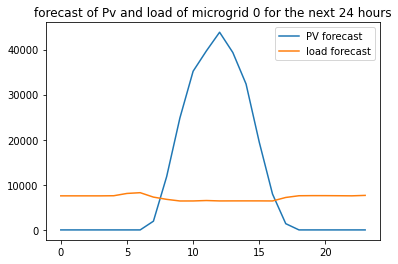

In [ ]:
plt.title("forecast of Pv and load of microgrid 0 for the next 24 hours")
mg4.set_horizon(24)
plt.plot(mg4.forecast_pv(), label ="PV forecast")
plt.plot(mg4.forecast_load(), label = "load forecast")
plt.legend()
plt.show()

#forecast for next hours (identifying the peak hours accurately


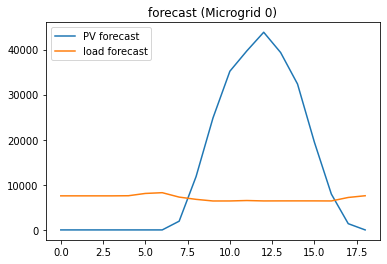

In [ ]:
plt.title("forecast (Microgrid 0)")
#change the horizon time
mg4.set_horizon(19)
#dont forget to change back the horizon at the right value afterward
plt.plot(mg4.forecast_pv(), label ="PV forecast")
plt.plot(mg4.forecast_load(), label ="load forecast")
plt.legend()
plt.show()

##forecast for next 4 days

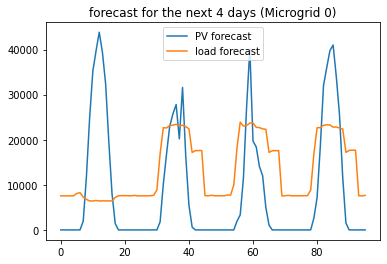

In [ ]:
plt.title("forecast for the next 4 days (Microgrid 0)")
#change the horizon time
mg4.set_horizon(24*4)
#dont forget to change back the horizon at the right value afterward
plt.plot(mg4.forecast_pv(), label ="PV forecast")
plt.plot(mg4.forecast_load(), label ="load forecast")
plt.legend()
plt.show()

what is my net load for over 4 days? (Microgrid 0)

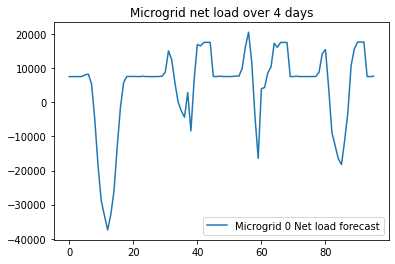

In [ ]:
plt.title("Microgrid net load over 4 days")
plt.plot(mg4.forecast_load()-mg4.forecast_pv(), label = "Microgrid 0 Net load forecast")

plt.legend()
plt.show()

now that the 4 day forecast is complete, we need to return our horizon back at 24 steps per hour

In [ ]:
mg4.set_horizon(24)
mg1.set_horizon(24)

#2. Design of the agent

##2.1 Action space

define the different actions our agent can take in a microgrid environment:

- actions_agent()
- run(): take dictionary as an input, we return a dictionary of actions related to control_dict.

In [ ]:
#to make things simple, the agent can take only one of the 5 actions defined at the full rate of the net_load
mg4.get_control_dict() #show the list of action that can be taken

['load',
 'pv_consummed',
 'pv_curtailed',
 'pv',
 'battery_charge',
 'battery_discharge',
 'grid_import',
 'grid_export']

define different actions our agents will take <br>
set a new function 'action_agent()'

In [ ]:
#action 0: battery_charge
#action 1: battery_discharge
#action 2: grid_import
#action 3: grid_export

def actions_agent(mg4, action):
 
    #initialize the architecture
    pv = mg4.pv
    load = mg4.load
    
    #initialize variable
    net_load = load - pv
    
    capa_to_charge = mg4.battery.capa_to_charge
    p_charge_max = mg4.battery.p_charge_max
    p_charge = max(0,min(-net_load, capa_to_charge, p_charge_max))
    
    capa_to_discharge = mg4.battery.capa_to_discharge
    p_discharge_max = mg4.battery.p_discharge_max
    p_discharge = max(0,min(net_load, capa_to_discharge, p_discharge_max))

    #change control dictionary based on the different scenarios

    #scenario action 0: battery_charge   
    #battery charge set to p_charge
    if action == 0:
        
        if p_charge > 0:        
          control_dict = {'pv_consummed': min(pv,load),
                          'battery_charge': p_charge,
                          'battery_discharge': 0,
                          'grid_import': 0,
                          'grid_export':max(0,pv - min(pv,load) - p_charge)
                          }
        else:
            
            control_dict = {'pv_consummed': min(pv,load),
                            'battery_charge': net_load,
                            'battery_discharge': 0,
                            'grid_import': 0,
                            'grid_export':max(0,pv - min(pv,load) - p_charge)
                           }

            
    #scenario action 1: battery_discharge      
    #battery discharge set to p_discharge
    elif action ==1:
    #     control_dict = {'pv_consummed': min(pv,load),
    #                         'battery_charge': 0,
    #                         'battery_discharge': p_discharge,
    #                         'grid_import': max(0,load - min(pv,load) - p_discharge),
    #                         'grid_export':0
                          #  }
        if p_discharge > 0:
        
            control_dict = {'pv_consummed': min(pv,load),
                            'battery_charge': 0,
                            'battery_discharge': p_discharge,
                            'grid_import': max(0,load - min(pv,load) - p_discharge),
                            'grid_export':0
                           }
        else:
            
            control_dict = {'pv_consummed': min(pv,load),
                            'battery_charge': 0,
                            'battery_discharge': net_load,
                            'grid_import': max(0,load - min(pv,load) - p_discharge),
                            'grid_export':0
                           }
    #scenario action 2: grid_import
        #import the net load into the grid
    elif action ==2:
        
        control_dict = {'pv_consummed': min(pv,load),
                        'battery_charge': 0,
                        'battery_discharge': 0,
                        'grid_import': abs(net_load),
                        'grid_export':0
                       }

    #scenario action 3: grid_export
      #export net load out of the grid
    elif action == 3:
        
        control_dict = {'pv_consummed': min(pv,load),
                        'battery_charge': 0,
                        'battery_discharge': 0,
                        'grid_import': 0,
                        'grid_export':abs(net_load)
                       }
    
    return control_dict

Initialize a Q-table<br>
round off the state to reduce the state space

In [ ]:
def init_qtable(mg4, nb_action):
    #net load is the forecast load - pv
    net_load = mg4.forecast_load() - mg4.forecast_pv()

    #initialize state and q
    state = [] #the states in the q table, the states depends on the action the agent takes
    Q = {} 

    #in range of the minimum net-load and the maximum net-load
    for i in range(int(net_load.min()-1),int(net_load.max()+2)):
        
        #for all battery state of charge level from min to max, round them off and append them to the state
        for j in np.arange(round(mg4.battery.soc_min,1),round(mg4.battery.soc_max+0.1,1),0.1):
            
            j = round(j,1)
            state.append((i,j)) 

    #Initialize Q(s,a) at zero
    for s in state:

        Q[s] = {}

        #for every actions, set the state to 0
        for a in range(nb_action):

            Q[s][a] = 0

    return Q

##2.2 Exploration strategy: greedy decreasing strategy

#2.2.1 Define functions

Define a function for the exploration strategy: <br>
here we selected the greedy decreasing strategy

In [ ]:
def epsilon_decreasing_greedy(action, epsilon, nb_action):
  #set p as random
  p = np.random.random()
  #if p value is less than 1-epsilon, set randomm to 0
  if p < (1 - epsilon):
      randomm=0
      return action, randomm
#if p is above 1-epsilon than randomm is true and return the choice of action
  else: 
      randomm=1
      return np.random.choice(nb_action), randomm

In [ ]:
def max_dict(d):

    max_key = None
    max_val = float('-inf')


    for k,v in d.items():

        if v > max_val:

            max_val = v
            max_key = k

    return max_key, max_val

define a function to decrease and update my epsilon


Epsilon-decrease function is a greedy strategy, however the epsilon decreases as the exploration goes further. this lead to the agent's behaviour to be very explorative in the beginning and as it progresses, the behaviour becomes more highly exploitative.

In [ ]:
def update_epsilon(epsilon):
    
    epsilon = epsilon - epsilon *0.02
    
    if epsilon < 0.1:
        
        epsilon = 0.1
    
    return epsilon

In [ ]:
def change_name_action(idx):
    
    #action 0: battery_charge
    #action 1: battery_discharge
    #action 2: grid_import
    #action 3: grid_export
    
    if idx == 0:
        
        action_name = "charge"
    elif idx == 1:
        action_name = "discharge"
    elif idx == 2:
        
        action_name = "import"
        
    else:
        
        action_name = "export"
    
    return action_name

print welcome function

In [ ]:
def print_welcome(idx):
    
    if idx == 0:
        print("------------------------------------")
        print("|        WELCOME TO PYMGRID        |")
        print("------------------------------------")
    elif idx == 1:
        
        print("t -     STATE  -  ACTION - COST -- Load -- pv ")
        print("=============================================")

In [ ]:
mg4.set_horizon(96)

define a function to charge in to the battery based on net load

if net load is negative, charge into the battery, if it is not the agent is free to take its own action

In [ ]:
def action_based_netload(mg,net_load):
  if net_load < 0:
    action = actions_agent(mg,0)
  else:
    action = actions_agent(mg,a) #the action of the agent
  return action

In [ ]:
def training_Q_Learning(mg,horizon):
    
    #initialize variables
    nb_action = 4
    Q = init_qtable(mg,nb_action)
    nb_state = len(Q)
    nb_episode = 1000
    alpha = 0.1
    epsilon = 0.99
    gamma = 0.99
    
    #initialize
    record_cost = []
    t0 = time.time()
    t = t0
    #start algorithm
    print_training = "Training Progressing .   "
    print_welcome(0)
    print("\n")


    #iterate through every episode with for loop
    for e in range(nb_episode+1): 
        
        #if there is no more episodes left, print the vlue and flush
        if e == 0:
            value_print="\rEpisode " + str(e) +"/" + str(nb_episode)
            sys.stdout.write(value_print)
            sys.stdout.flush()
        
        #if there are still episodes
        else:
            
            now = time.time()
            
            #when episode is 1, 50, 100,200,300,400,450, 485, or total declared episode -5
              #calculate the time difference
              #print the total time difference in each episodes
            if e == 1 or e == 50 or e == 100 or e == 200 or e == 300 or e == 400  or e == 450  or e == 485 or e == nb_episode-5:
                diff_time_t = now - t 
                total_time = (nb_episode+1) * diff_time_t
            #identify current time and calculate the number of time remaining
            now = time.time()
            diff_time = now - t0
            time_remaining = total_time - diff_time
            
            t = time.time()
        
        #if episode is the modulus of 10, print training progressing
        if e % 10 == 0:
        
            if print_training == "Training Progressing .   ":
                
                print_training = "Training Progressing ..  "
                
            elif print_training == "Training Progressing ..  ":
            
                print_training = "Training Progressing ... "
            
            else:
                
                print_training = "Training Progressing .   "
        #print the training for each episode
        value_print="\r"+ print_training +"Episode " + str(e) +"/" + str(nb_episode) 
        sys.stdout.write(value_print)
        sys.stdout.flush()
        
        # before begin training in each episode the cost for each episode is reset to 0 and reset the microgrid
        episode_cost = 0
        mg.reset()


        #the state consist of the net load and the state of charge of the battery
        net_load = round(mg.load - mg.pv)
        soc = round(mg.battery.soc,1)
        s = (net_load, soc)
        

        #apply the greedy decreasing strategy 
        a = max_dict(Q[s])[0] #maximum value in the dictionary
        a,randomm = epsilon_decreasing_greedy(a, epsilon, nb_action)
        
        
 # /////////////////////////////////////////////////////////////////////////////////BASELINE\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\
  #horizon is the total number of hours we want our agent to go through
    #     for i in range (horizon):
          
    #       #pick the time when sunrise is high
    #       #approximately 7AM to 5PM, this is the approximate peak sunrise hour
    #       if i ==7 or i ==8 or i==9 or i ==10 or i==11 or i ==12 or i==13 or i ==14 or i==15 or i ==16 or i==17:
    #         action = actions_agent(mg,0) #the action of the agent is to charge only

    #         #in every hour aside from the peak sunrise hour, the agent makes its own decision
    #       else:
    #         action = actions_agent(mg,a) #the action of the agent
    #       status = mg.run(action) #the status is based on the action the agent takes in the microgrid
    #       r = -mg.get_cost() #reward is subtracted by the cost
    #       episode_cost += mg.get_cost() #add cost into the amount of cost in the episode
    #       net_load = round(mg.load - mg.pv) #netload is the microgrid load - pv
    #       soc = round(mg.battery.soc,1)#state of charge of the battery

    #       #the next state, the next action
    #       s_ = (net_load, soc) #the state consist of the current net load and the state of charge
    #       a_ = max_dict(Q[s_])[0] #maximum value in the dictionary is put inside a
    #       if i == horizon-1: #in the last hour of the training
    #           Q[s][a] += alpha*(r - Q[s][a]) #calculate the q value 
    #           #q value = qvalue +alpha *(reward -q-value)
    #       # if its still not the last hour
    #       else:
    #           old_Q = Q[s][a]  
    #           target = r + gamma*Q[s_][a_] 
    #           td_error = target - Q[s][a]
    #           Q[s][a] = (1-alpha) * Q[s][a] + alpha * td_error
    #       s, a = s_, a_
    #     epsilon = update_epsilon(epsilon)
    # return Q

# #//////////////////////////////////////////////////////////////////////////////////////////NORMAL\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\
  #horizon is the total number of hours we want our agent to go through
        for i in range (horizon):
            #in every hour,
            if net_load < 0:
              action = actions_agent(mg,0)
            else:
              action = actions_agent(mg,a) #the action of the agent
            status = mg.run(action) #the status is based on the action the agent takes in the microgrid
            r = -mg.get_cost() #reward is subtracted by the cost
            episode_cost += mg.get_cost() #add cost into the amount of cost in the episode
            net_load = round(mg.load - mg.pv) #netload is the microgrid load - pv
            soc = round(mg.battery.soc,1)#state of charge of the battery
            s_ = (net_load, soc) #the state consist of the current net load and the state of charge
            a_ = max_dict(Q[s_])[0] #maximum value in the dictionary is put inside a
            if i == horizon-1: #in the last hour of the training
                Q[s][a] += alpha*(r - Q[s][a]) #calculate the q value 
                #q value = qvalue +alpha *(reward -q-value)
            # if its still not the last hour
            else:
                old_Q = Q[s][a]  
                target = r + gamma*Q[s_][a_] 
                td_error = target - Q[s][a]
                Q[s][a] = (1-alpha) * Q[s][a] + alpha * td_error
            s, a = s_, a_
        epsilon = update_epsilon(epsilon)
    return Q

In [ ]:
def testing_Q_Learning(mg, Q,horizon):
    
    mg.reset()
    
    mg.set_horizon(horizon) 
    net_load = round(mg.load - mg.pv)
    soc = round(mg.battery.soc,1)
    s = (net_load, soc)
    a = max_dict(Q[s])[0]
    total_cost = 0
    print_welcome(1)
    for i in range (horizon):
        #pick the time when sunrise is high
        #approximately 7AM to 5PM, this is the approximate peak sunrise hour
#////////////////////////////////////////////BLIND_OBEDIENCE\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\
      # if i ==7 or i ==8 or i==9 or i ==10 or i==11 or i ==12 or i==13 or i ==14 or i==15:
      #    # the action of the agent is to charge only
      #   a=0
      #   action_name = change_name_action(a)
      #   action = actions_agent(mg, a)
      #   status = mg.run(action)
      #   cost = mg.get_cost()
      #   total_cost += cost
      #   if i < 10:
      #       print(i," -",(int(net_load),soc),action_name, round(total_cost,1), "€")
      #   else:
      #       print(i,"-",(int(net_load),soc),action_name, round(total_cost,1), "€")
      #   net_load = round(mg.load - mg.pv)
      #   soc = round(mg.battery.soc,1)
      #   s_ = (net_load, soc)
      #   a_ = max_dict(Q[s_])[0]

      #   s, a = s_, a_

      #   #in every hour aside from the peak sunrise hour, the agent makes its own decision
      # else:
        action_name = change_name_action(a)
        action = actions_agent(mg, a)
        status = mg.run(action)
        cost = mg.get_cost()
        total_cost += cost

        load =mg.load
        pv_gen = mg.pv
        #battery_capacity =mg.battery.capacity
        
        if i < 10:
            print(i," -",(int(net_load),soc),action_name, round(total_cost,1), "€", round(load,1), round(pv_gen,1))
        else:
            print(i," -",(int(net_load),soc),action_name, round(total_cost,1), "€", round(load,1), round(pv_gen,1))
        net_load = round(mg.load - mg.pv)
        soc = round(mg.battery.soc,1)
        s_ = (net_load, soc)
        a_ = max_dict(Q[s_])[0]

        s, a = s_, a_

In [ ]:
Q1 = training_Q_Learning(mg4,96)  #train microgrid 0 for your chosen number of days

------------------------------------
|        WELCOME TO PYMGRID        |
------------------------------------


Training Progressing ... Episode 1000/1000

In [ ]:
testing_Q_Learning(mg4,Q1, 96)

t -     STATE  -  ACTION - COST -- Load -- pv 
0  - (7556, 0.2) import 741.2 € 7554.7 0.0
1  - (7555, 0.2) discharge 1484.0 € 7553.5 0.0
2  - (7554, 0.2) discharge 2235.6 € 7552.1 0.0
3  - (7552, 0.2) discharge 2983.9 € 7580.3 0.0
4  - (7580, 0.2) import 3715.6 € 8088.5 0.0
5  - (8089, 0.2) discharge 4725.1 € 8256.5 0.0
6  - (8256, 0.2) import 5749.7 € 7276.3 1936.1
7  - (5340, 0.2) import 6413.5 € 6778.8 11823.9
8  - (-5045, 0.2) discharge 6413.5 € 6417.3 24823.2
9  - (-18406, 0.2) charge 190799.2 € 6422.4 35195.1
10  - (-28773, 0.4) charge 478852.4 € 6518.7 39689.5
11  - (-33171, 0.7) discharge 478852.4 € 6428.3 43838.3
12  - (-37410, 0.7) charge 853278.7 € 6436.9 39343.8
13  - (-32907, 0.9) charge 1182529.4 € 6439.3 32360.1
14  - (-25921, 1.0) charge 1441737.0 € 6438.1 19429.9
15  - (-12992, 1.0) charge 1571654.5 € 6423.4 7951.7
16  - (-1528, 1.0) import 1573328.9 € 7197.1 1382.9
17  - (5814, 1.0) discharge 1573445.2 € 7578.6 0.0
18  - (7579, 0.9) discharge 1573596.8 € 7603.4 0.0
19

#Analyse Microgrid 4 further

a simple plot explaining what is actually going on inside the microgrid

In [ ]:
mg4.print_actual_production()

In [ ]:
mg4.print_control()

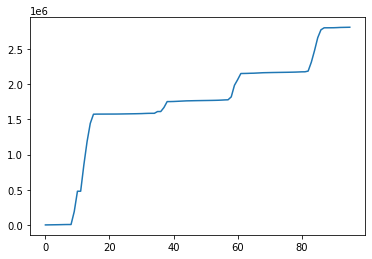

In [ ]:
mg4.print_cumsum_cost()

In [ ]:
mg4.print_load_pv()

Load


PV
